<i>Alunos: Lara Destefani e Lucas Borges Pacheco</i>

### **Caracterização meteorológica da área de estudo**

A caracterização meteorológica serve como base para a compreensão dos mecanismos de movimentação e dispersão dos poluentes atmosféricos na área de estudo. Essa caracterização está intimamente relacionada à turbulência atmosférica, que é um dos principais mecanismos que controlam a dispersão de poluentes. A turbulência refere-se aos movimentos caóticos e irregulares do ar, com rápidas alterações de velocidade e direção, e pode ser dividida em dois tipos principais:
- **Turbulência Mecânica**: Gerada pela movimentação do ar sobre a superfície e suas interações com obstáculos físicos, como edificações e morros. Essas interações geram atrito e cisalhamento, resultando em turbulência.
- **Turbulência Térmica**: Gerada pelo gradiente de temperatura na atmosfera, que causa movimentos verticais do ar devido à convecção. A turbulência térmica é influenciada pelo perfil de temperatura, albedo das superfícies, razão de Bowen, pressão atmosférica e umidade do ar.

Ambos os tipos de turbulência desempenham papéis cruciais na dispersão de poluentes na atmosfera e na determinação da qualidade do ar em diferentes regiões. Assim como os fatores de emissão, os dados meteorológicos podem ser inseridos em modelos numéricos de dispersão de poluentes atmosféricos, permitindo estimar os impactos dessas emissões na atmosfera. Dessa forma, a caracterização meteorológica desempenha um papel fundamental na gestão e preservação da qualidade do ar.

**Bibliotecas utilizadas no estudo**

In [24]:
import os
import numpy
import pandas
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from siphon.simplewebservice.wyoming import WyomingUpperAir

warnings.filterwarnings('ignore')

#### **Meteorologia de superfície**

A meteorologia de superfície da área de estudo foi analisada utilizando dados meteorológicos de uma **estação em Joinville**, com coordenadas UTM -26.22445 e -48.79736, obtidos no site do Professor Leonardo Hoinaski *(https://hoinaski.prof.ufsc.br/BRAIN/getMETAR)* ao longo do ano de 2023. A proximidade do local da estação da empresa Embraco justifica a utilização dessa estação.

O objetivo deste estudo é analisar especificamente a meteorologia em torno das atividades poluidoras realizadas pelas fontes estacionárias da empresa Embraco. Nesta primeira etapa do estudo, serão analisados dados das seguintes variáveis: temperatura, umidade, pressão, cobertura de nuvens, velocidade e direção do vento.

**Importação da tabela de dados da estação meteorológica**

In [25]:
root = os.path.dirname(os.getcwd()).replace('\\','/')
filepath = f'{root}/tabelas/metar.csv'
metar = pandas.read_csv(filepath,delimiter=',')
metar['Data'] = pandas.to_datetime(metar[['day','month','year','hour']])
metar = metar.rename(columns={
    'temp':'AirTemperature',
    'p':'AirPressure',
    'relh':'RelativeHumidity',
    'wd':'WindDirection',
    'ws':'WindSpeed',
    'cco':'CloudCoverage',
    'vis':'Visibility'})
metar = metar[['Data','WindDirection','WindSpeed','AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']]
metar.head()

,Data,WindDirection,WindSpeed,AirTemperature,AirPressure,CloudCoverage,RelativeHumidity
0,2023-01-01 00:00:00,50.0,2.572220,26.0,1009.654835,6.0,78.62
1,2023-01-01 01:00:00,20.0,3.086664,26.0,1009.654835,6.0,78.62
2,2023-01-01 02:00:00,350.0,2.057776,25.0,1009.654835,6.0,83.44
3,2023-01-01 08:00:00,320.0,0.514444,21.0,1009.658428,NaN,100.00
4,2023-01-01 09:00:00,0.0,0.000000,22.0,1009.654835,1.0,94.06


**Séries temporais**


As séries temporais das variáiveis meteorológicas fornecem dados contínuos e detalhados sobre as condições meteorológicas na área de estudo. Essas informações permitem a modelagem dos poluentes atmoféricos, sendo inseridas como inputs ou dados de calibração, à depender da condução do estudo. Assim, as séries temporais permitem modelar com precisão a trajetória e a concentração dos poluentes, prever episódios de alta poluição e desenvolver estratégias eficazes de mitigação e controle ambiental.

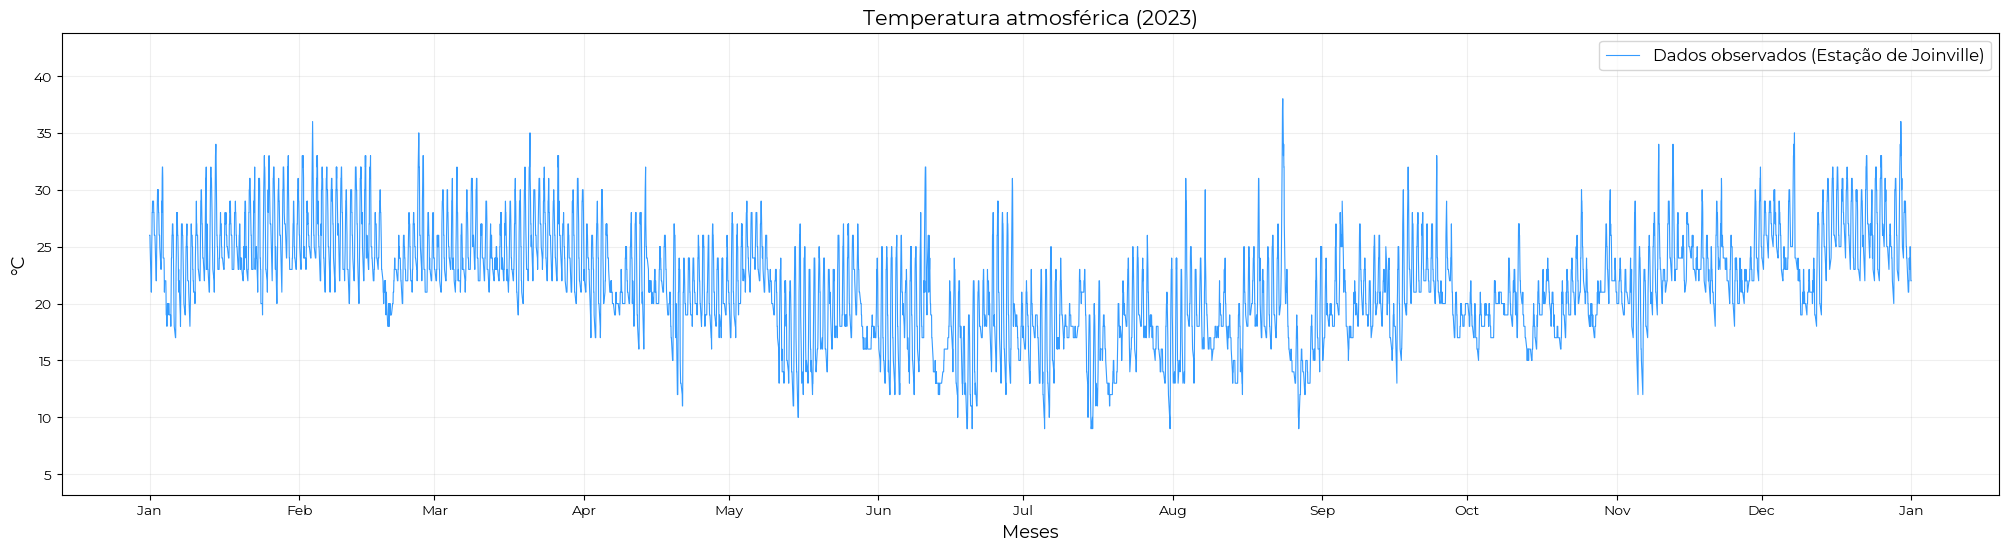

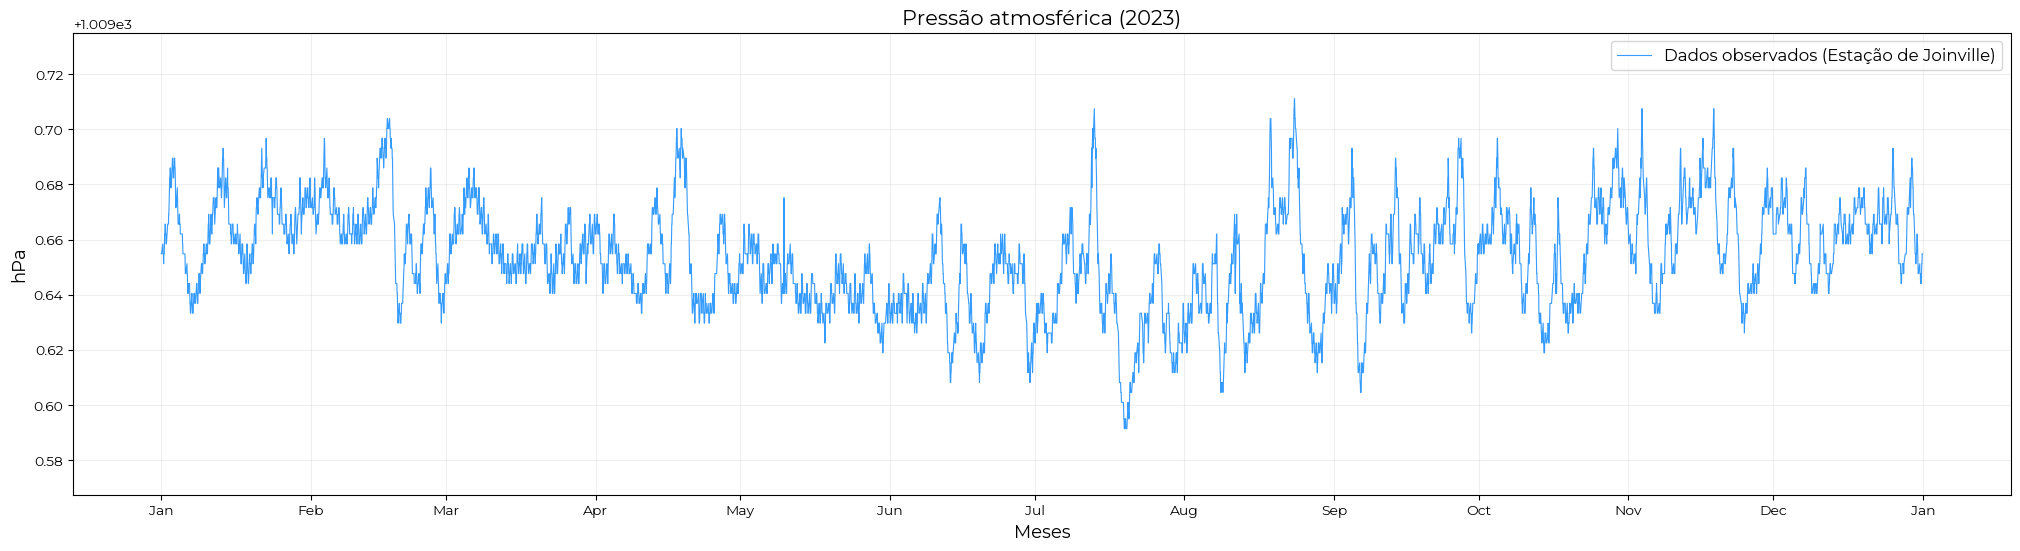

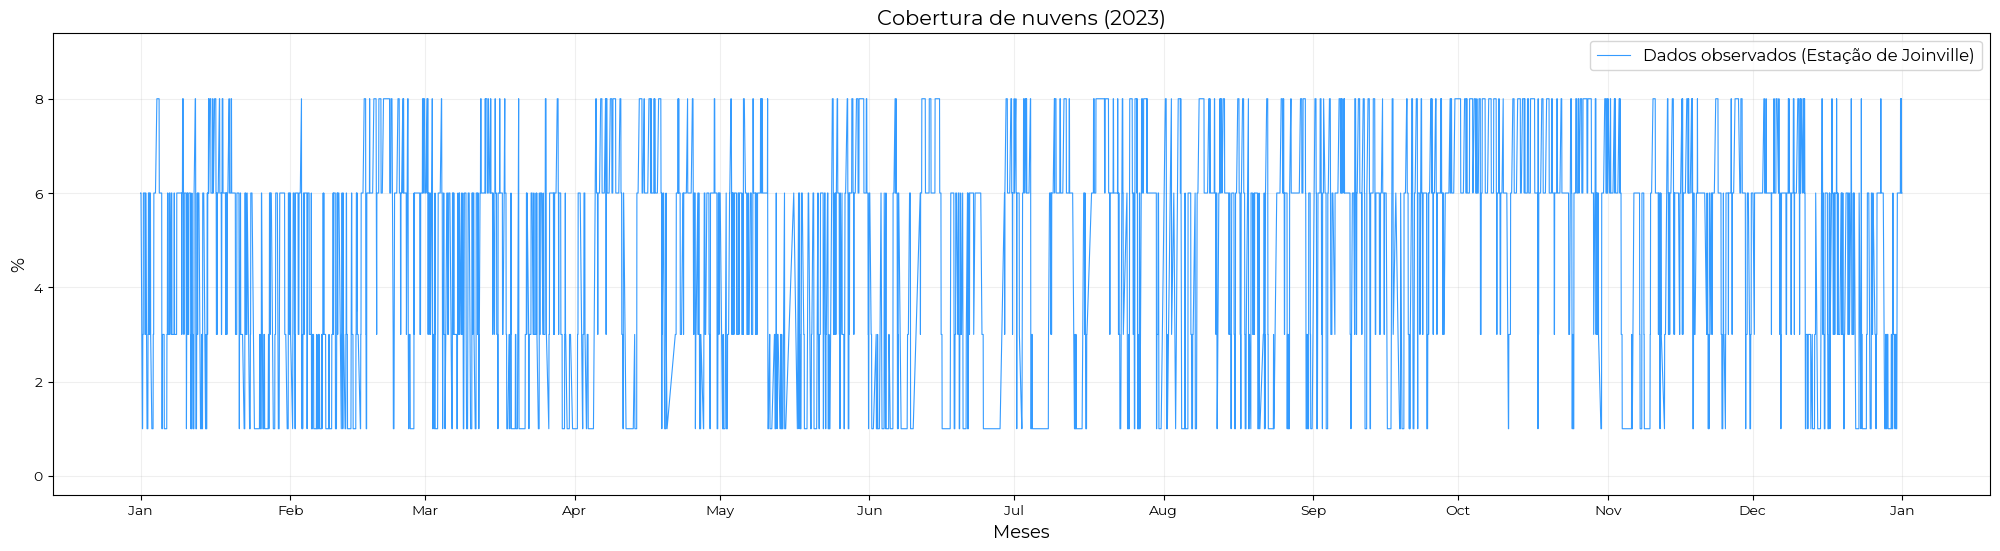

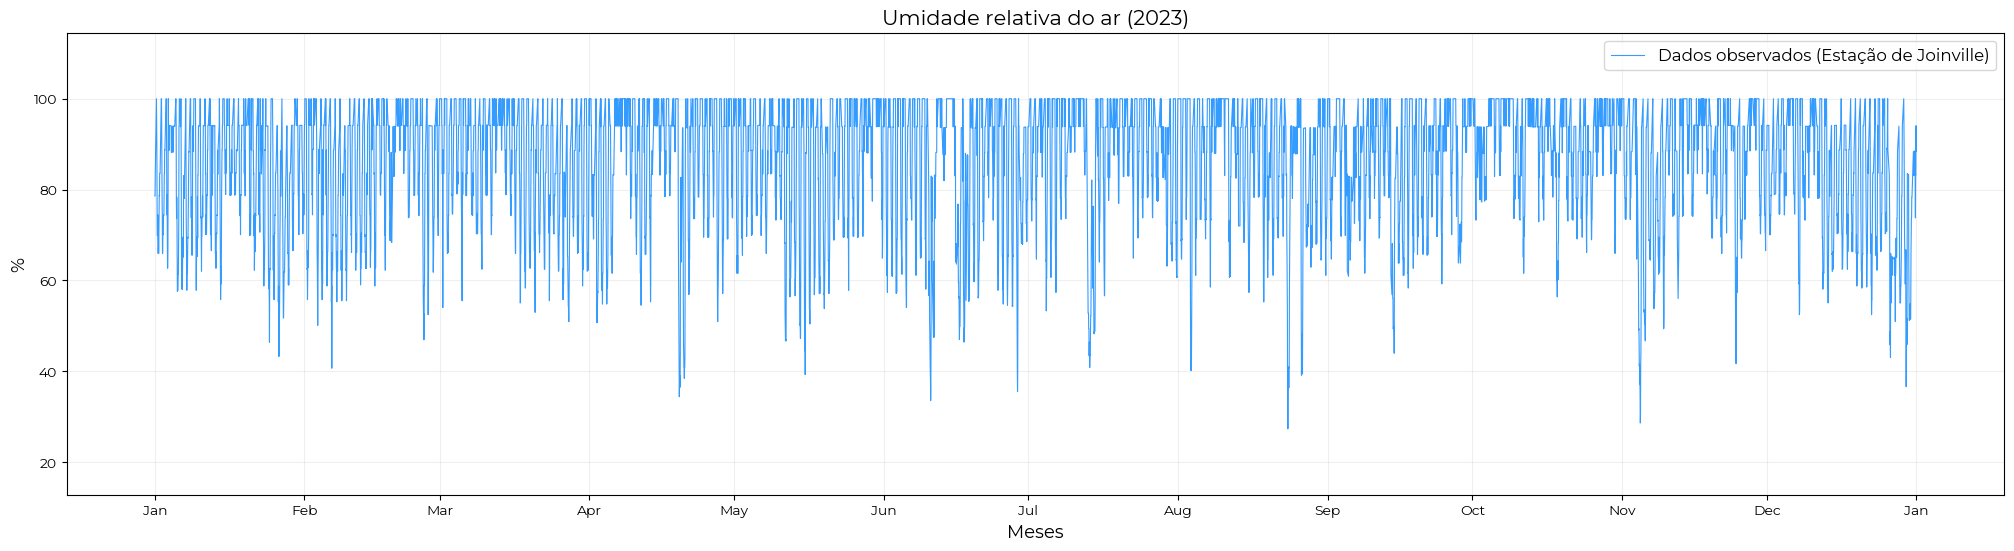

In [26]:
translate = {'AirTemperature':'Temperatura atmosférica',
             'AirPressure': 'Pressão atmosférica',
             'CloudCoverage':'Cobertura de nuvens',
             'RelativeHumidity':'Umidade relativa do ar',
             'WindSpeed':'Velocidade do vento',
             'WindDirection':'Direção do vento'}

units = {'AirTemperature':'°C','AirPressure':'hPa','CloudCoverage':'%','RelativeHumidity':'%'}

for i in ['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']:
    dados = metar.dropna(subset=i,axis=0) # Eliminação de dados vazios.
    plt.figure(figsize=(25,6))
    plt.rc('font',family='Montserrat')
    plt.plot(dados.Data,dados[i],color='dodgerblue',alpha=0.9,linewidth=0.8,label='Dados observados (Estação de Joinville)')
    plt.title(f'{translate[i]} (2023)', fontsize=15)
    plt.xlabel('Meses', fontsize=13)
    plt.ylabel(units[i], fontsize=13)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.margins(y=0.2)
    plt.show()

**Análise de outliers com Boxplot**

Na estatística descritiva, o **Boxplot** é uma representação gráfica que mostra a distribuição de um conjunto de dados, incluindo os quartis, a amplitude interquartil e os outliers. Os outliers são dados discrepantes que se destacam significativamente dos demais valores em um conjunto de dados. Eles podem ser causados por erros de medição, variações naturais ou eventos incomuns. A relevância deles deve ser analisada para definir se continuarão no dataset ou se devem ser tratados, pois se não forem relevantes, podem interferir significativamente nos resultados das análises.
- O retângulo é desenhado entre o primeiro e o terceiro quartil, representando a ampitude interquartil;
- A linha dentro da caixa representa a mediana;
- Os bigodes se estendem a partir da caixa até os valores extremos;
- Os pontos fora dos limites máximo e mínimo são considerados outliers.

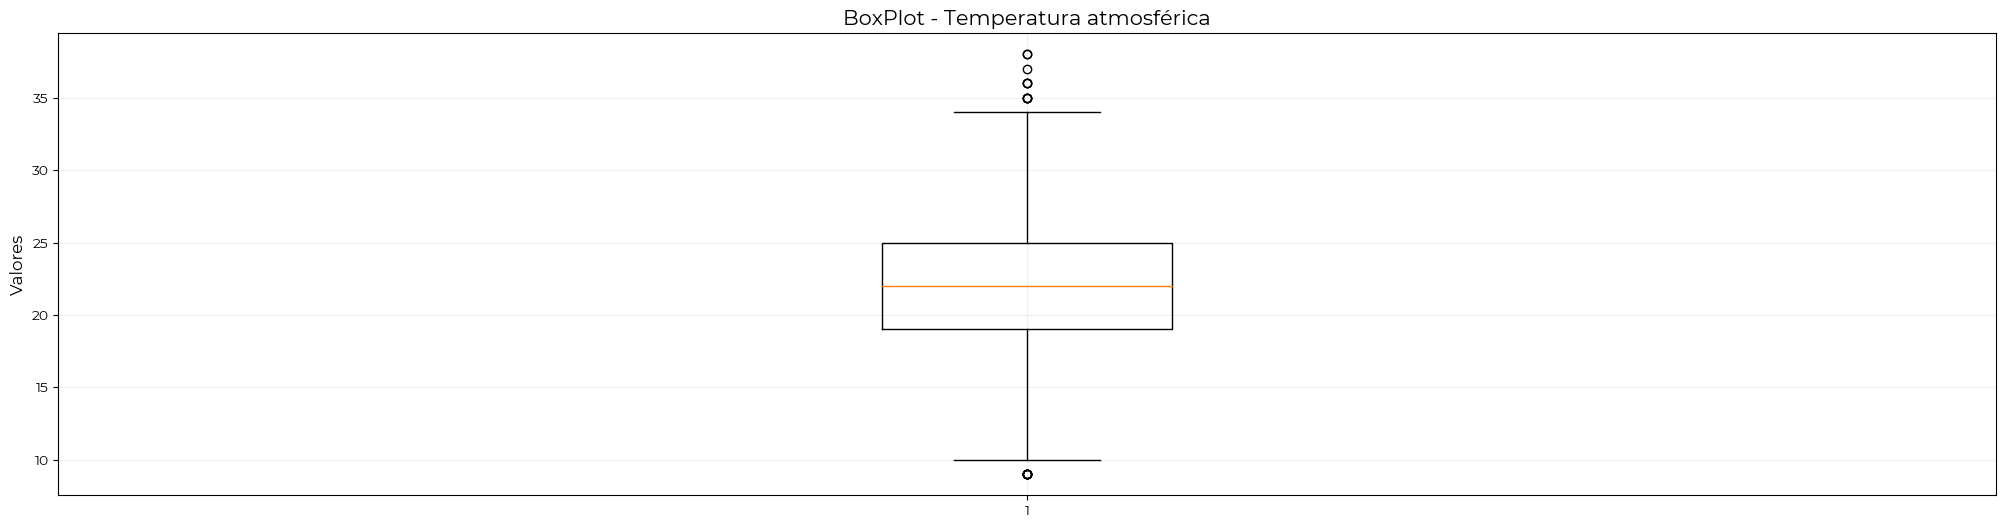

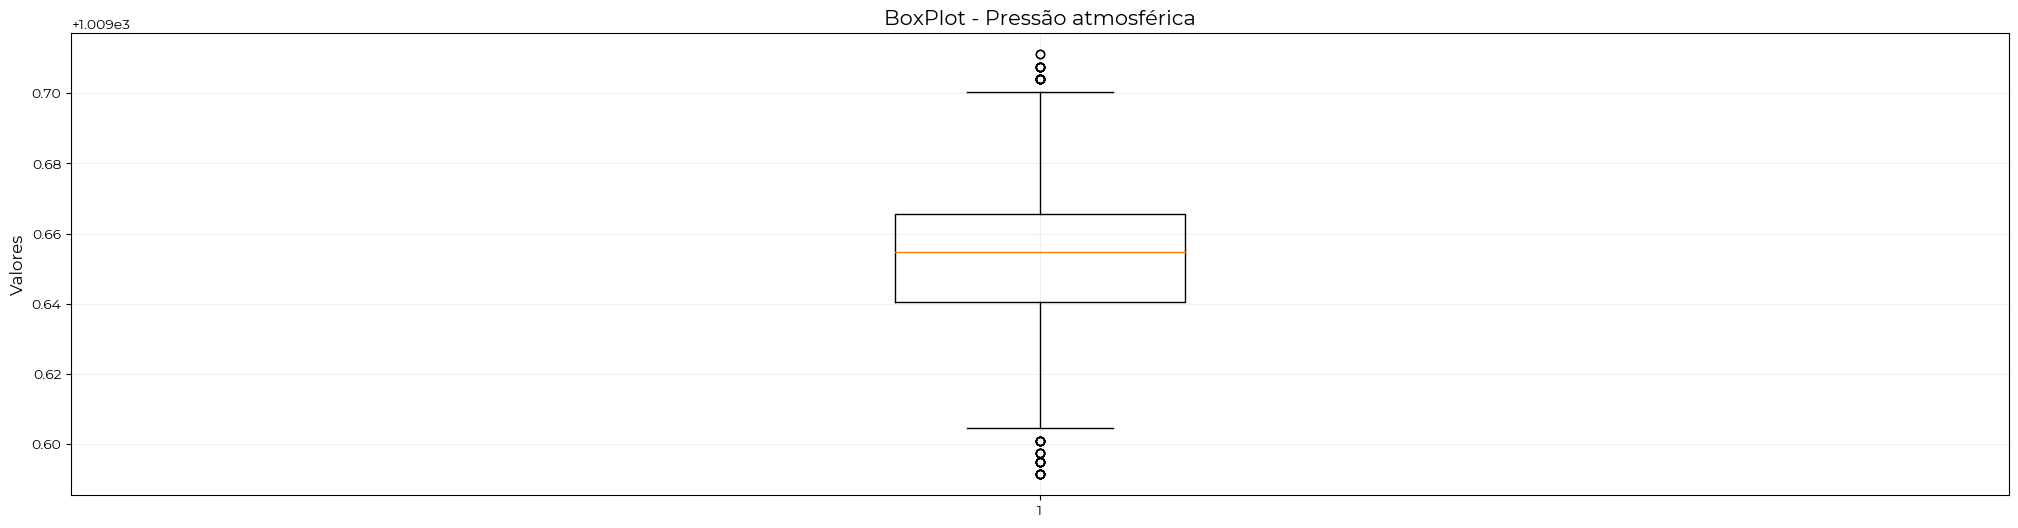

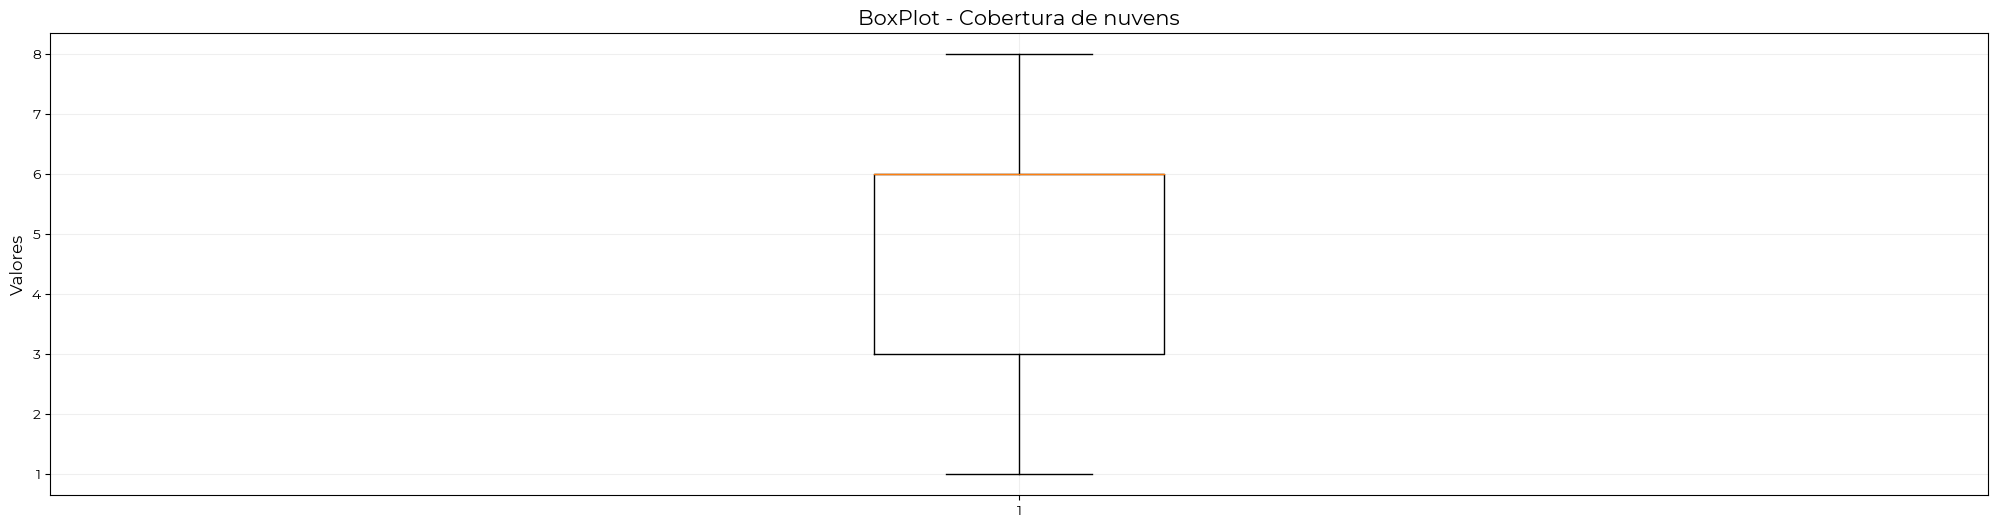

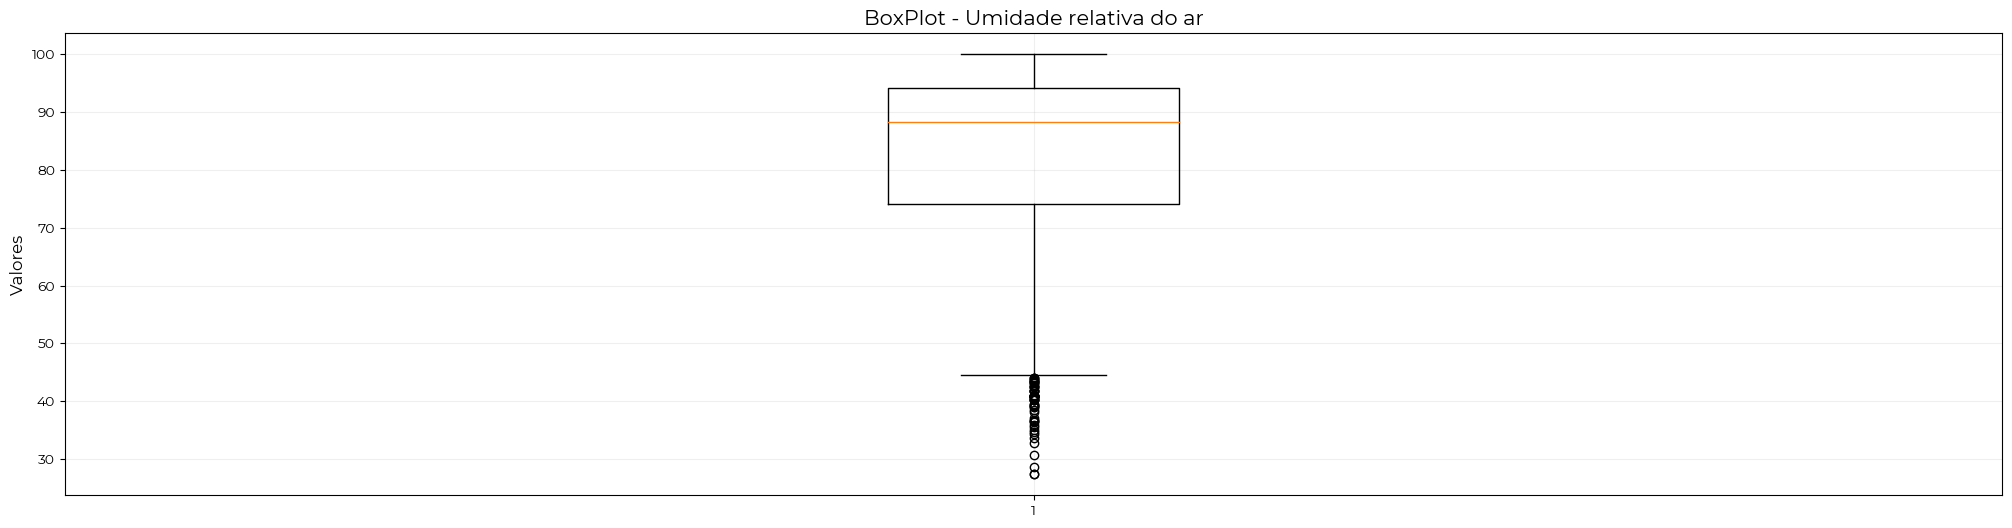

In [27]:
for i in ['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']:
    dados = metar.dropna(subset=i,axis=0)
    plt.figure(figsize=(25,6))
    plt.rc('font',family='Montserrat')
    plt.boxplot(dados[i])
    plt.title(f'BoxPlot - {translate[i]}',fontsize=15)
    plt.ylabel('Valores',fontsize=12)
    plt.grid(alpha=0.2)
    plt.show()

Para complementar, as medidas de tendência central e dispersão nos ajudam a entender onde os dados estão concentrados.

In [28]:
estatistics = round(metar[['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']].agg(['min', 'mean', 'max','median','std']),2)
estatistics

,AirTemperature,AirPressure,CloudCoverage,RelativeHumidity
min,9.00,1009.59,1.00,27.37
mean,22.17,1009.65,5.00,84.49
max,38.00,1009.71,8.00,100.00
median,22.00,1009.65,6.00,88.34
std,4.65,0.02,2.35,14.00


O tratamento de outliers com boxplot é uma abordagem eficaz para identificar e lidar com valores atípicos em um conjunto de dados. Ao observar um boxplot, é possível identificar pontos que estão além dos "bigodes" (linhas que se estendem a partir da caixa), indicando a presença de outliers. Uma vez identificados, os outliers podem ser tratados de diferentes maneiras, dependendo do contexto do problema e da natureza dos dados. Uma abordagem comum é remover os outliers do conjunto de dados, especialmente se forem causados por erros de medição ou valores extremamente incomuns que possam distorcer as análises estatísticas. No entanto, é importante exercer cautela ao remover outliers, pois isso pode afetar a interpretação dos resultados e a representatividade dos dados. 

Para o presente dataset, **não foram identificados outliers potencialmente significativos** que indicassem discrepâncias em relação à realidade do estudo. Portanto, decidiu-se não remover nenhum outlier, exceto os dados vazios.

**Máximos, médias e mínimos**

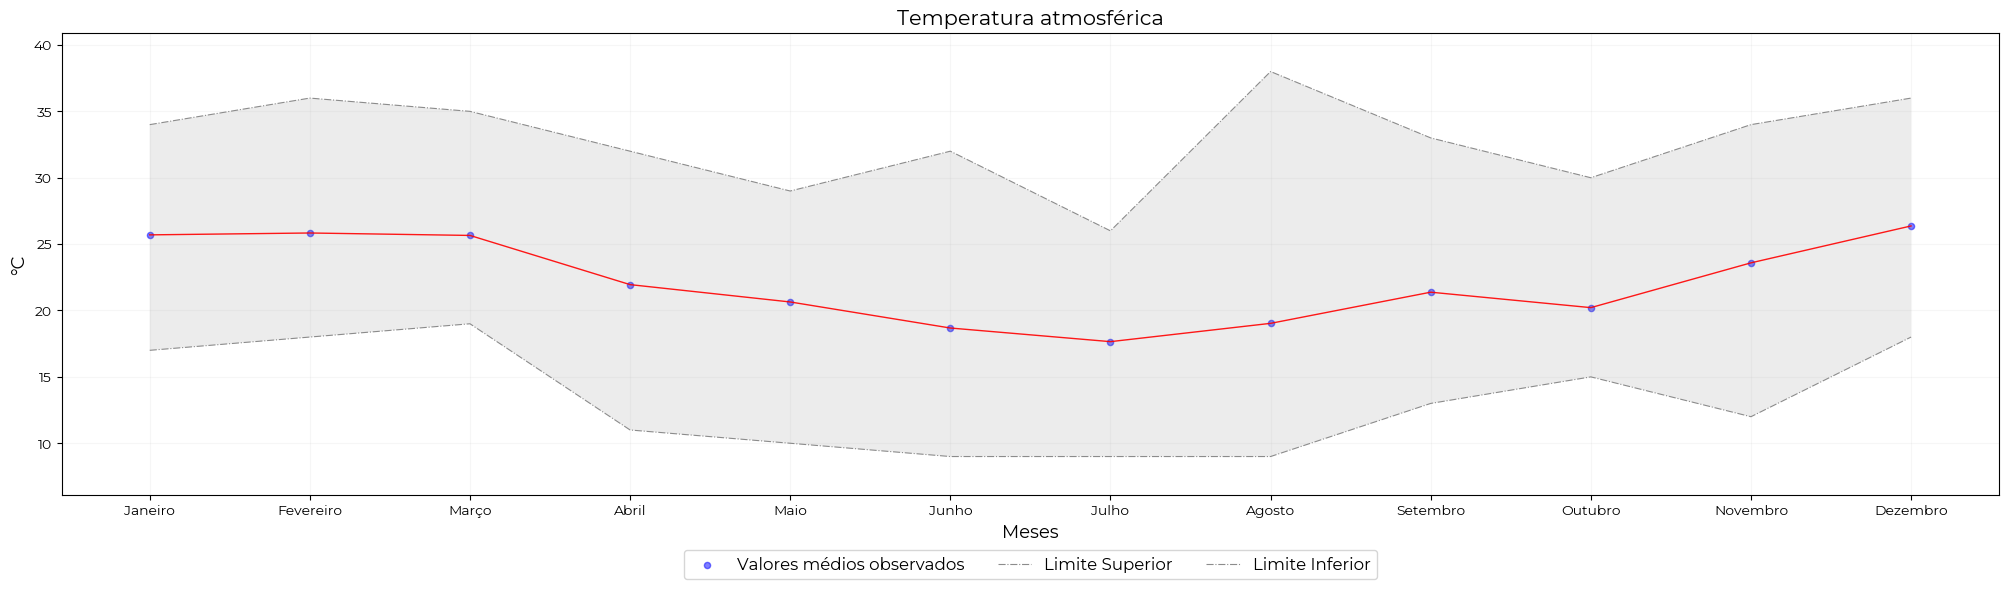

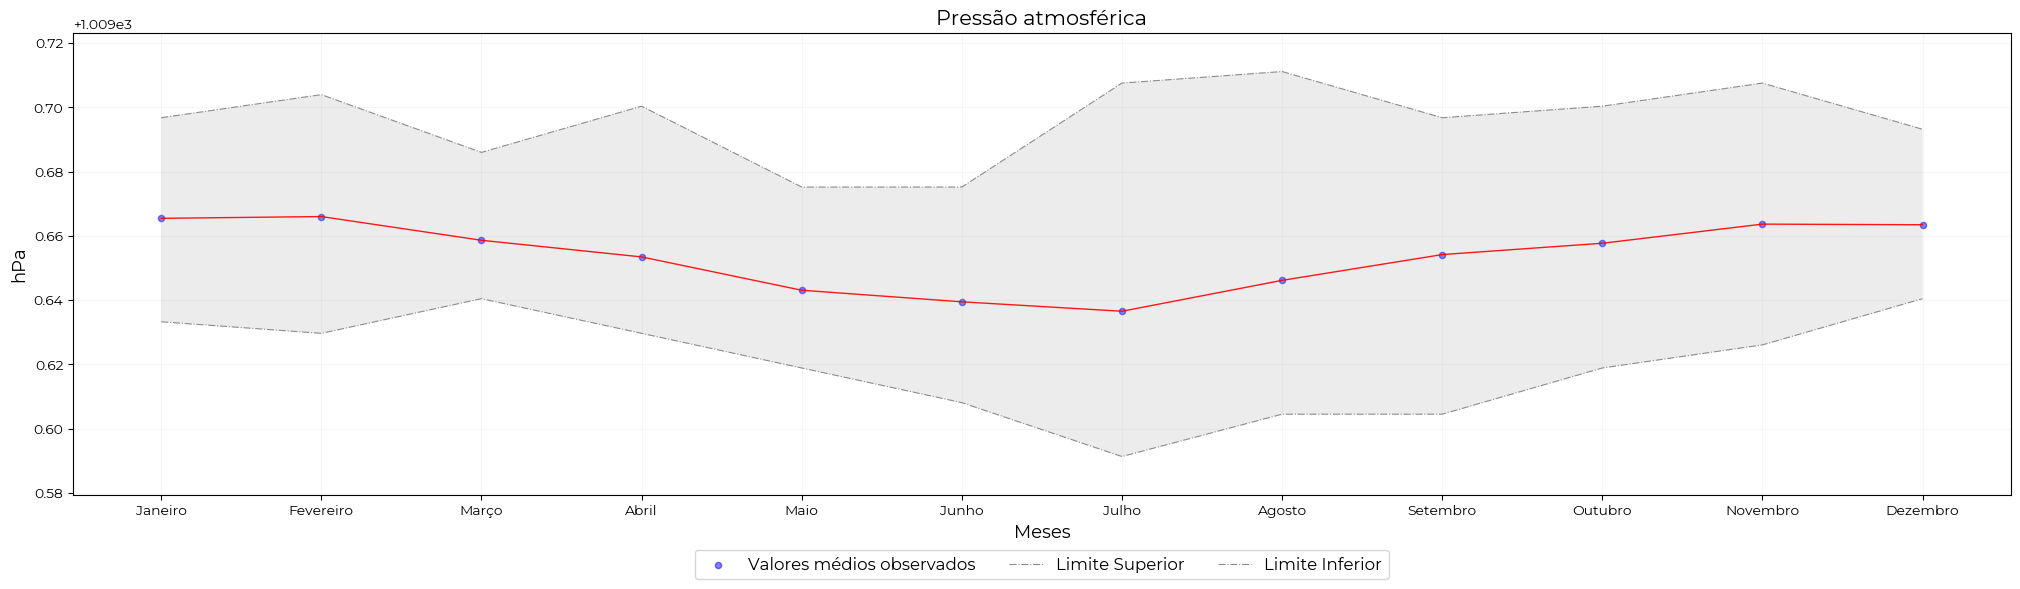

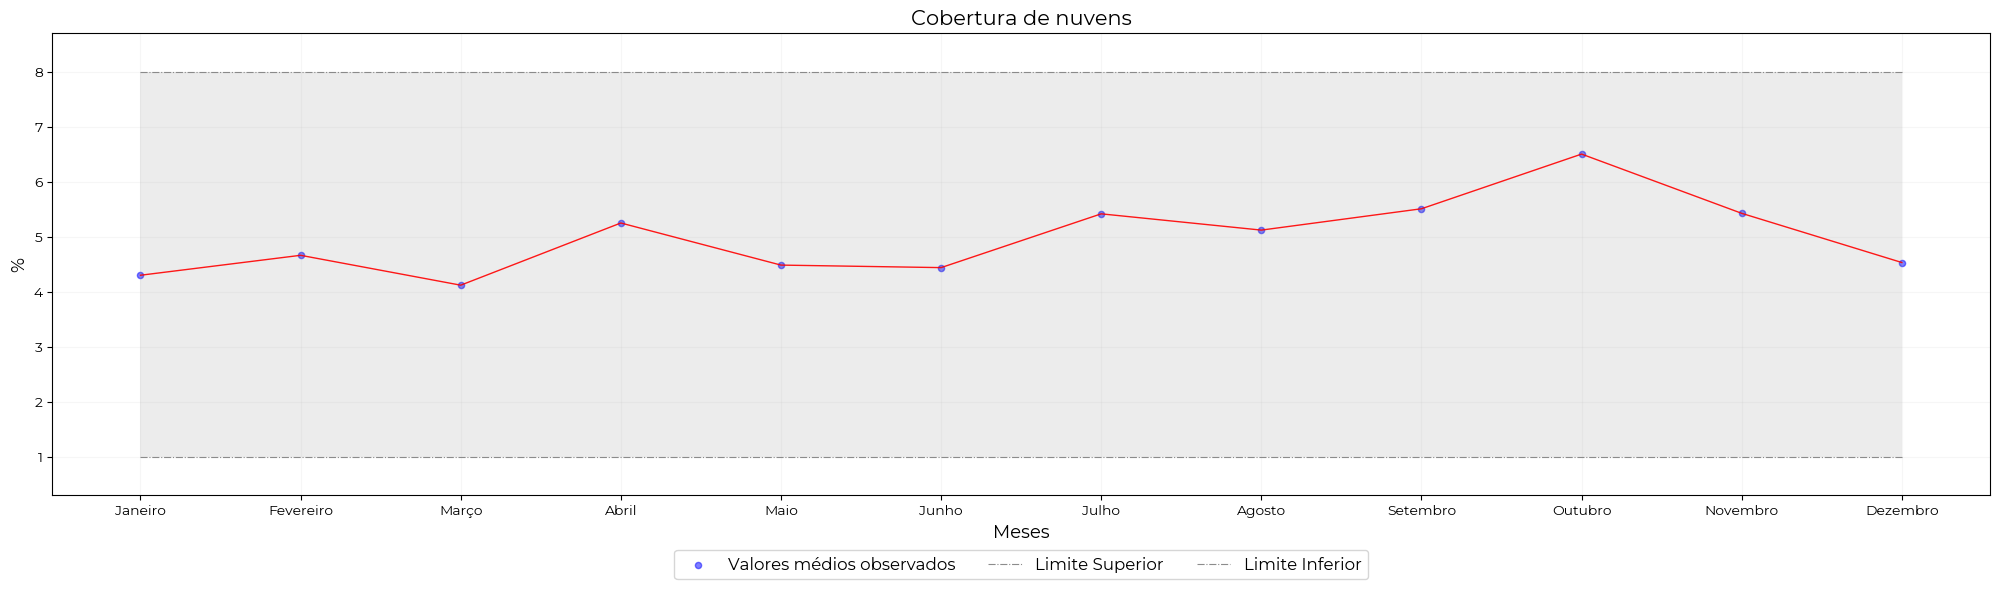

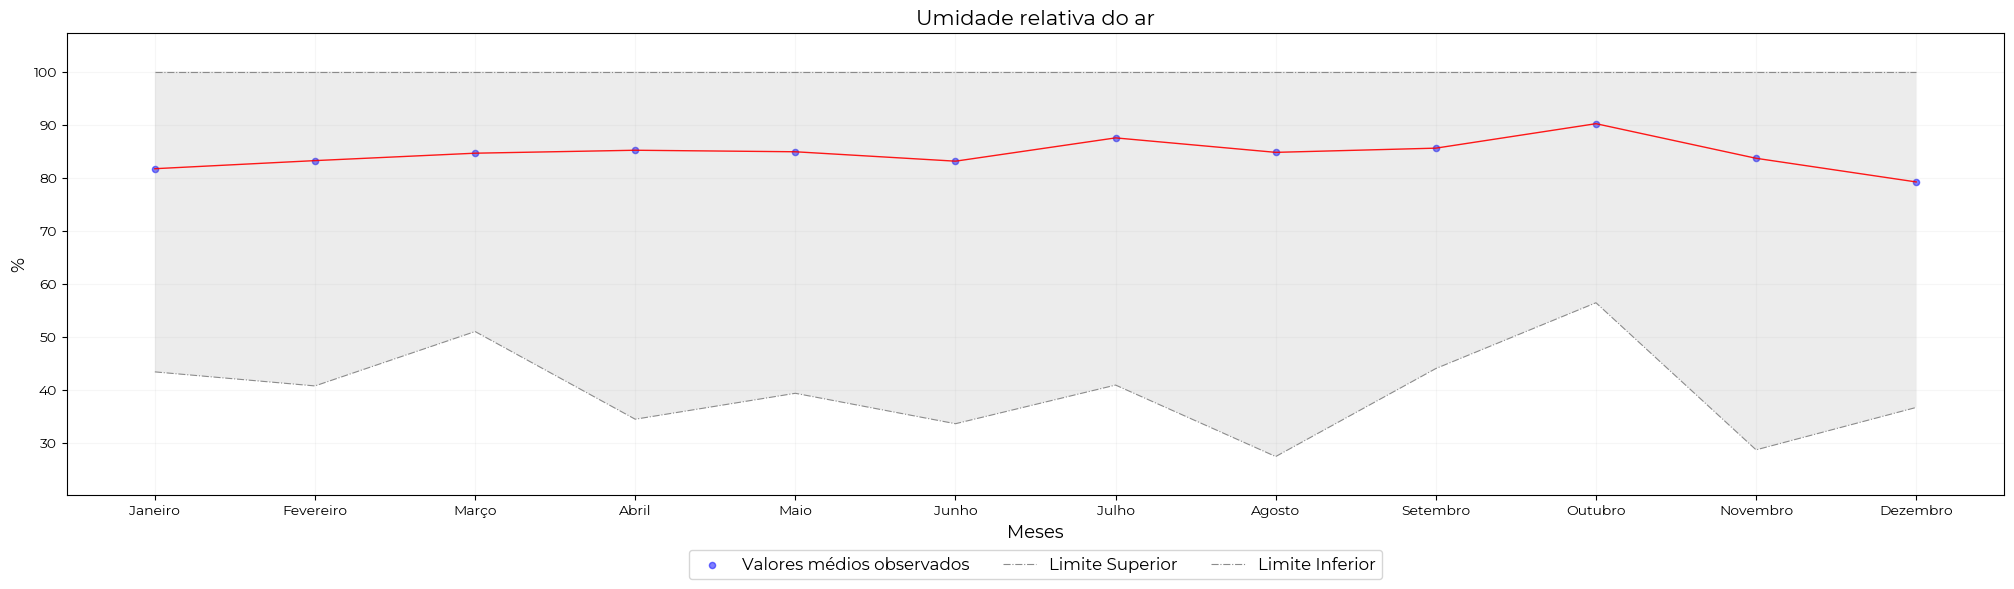

In [29]:
meses_pt = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 
            5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 
            9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

for i in ['AirTemperature','AirPressure','CloudCoverage','RelativeHumidity']:
    dados = metar.dropna(subset=i,axis=0) # Eliminação de dados vazios
    dados_agrupados = metar.resample(rule='M', on='Data')[i]

    plt.figure(figsize=(25,6))
    plt.rc('font',family='Montserrat')
    plt.scatter(dados_agrupados.mean().index.month.map(meses_pt), dados_agrupados.mean().values, color='blue', alpha=0.5, s=20, label = 'Valores médios observados')
    plt.plot(dados_agrupados.mean().index.month.map(meses_pt), dados_agrupados.mean().values, color='red', alpha=0.9, linewidth=1)
    plt.plot(dados_agrupados.max().index.month.map(meses_pt), dados_agrupados.max().values, color='gray', alpha=0.9, linewidth=0.8, linestyle='-.', label = 'Limite Superior')
    plt.plot(dados_agrupados.min().index.month.map(meses_pt), dados_agrupados.min().values, color='gray', alpha=0.9, linewidth=0.8, linestyle='-.', label = 'Limite Inferior')
    plt.fill_between(
            x = numpy.squeeze(dados_agrupados.mean().index.month.map(meses_pt)),
            y1 = numpy.squeeze(dados_agrupados.max().values),
            y2 = numpy.squeeze(dados_agrupados.min().values),
            facecolor='gray', alpha=0.15, linewidth=0)
    
    plt.title(translate[i], fontsize=15)
    plt.xlabel('Meses', fontsize=13)
    plt.ylabel(units[i], fontsize=13)
    plt.grid(alpha=0.1)
    plt.legend(fontsize=12,ncol=3,loc='center',bbox_to_anchor=(0.5, -0.15))
    plt.margins(y=0.1)
    plt.show()

**Rosas dos ventos**

A rosa dos ventos é uma representação gráfica que mostra a distribuição de frequência e direção dos ventos em um determinado local ao longo do tempo. Cada setor, representando uma direção cardinal e suas subdivisões, é colorido de acordo com a intensidade do vento naquela direção. Essa ferramenta é fundamental na modelagem da dispersão de poluentes atmosféricos, permitindo simular com precisão a trajetória dos poluentes. Assim, a análise conjunta das variáveis do vento frequentemente recorre à rosa dos ventos.

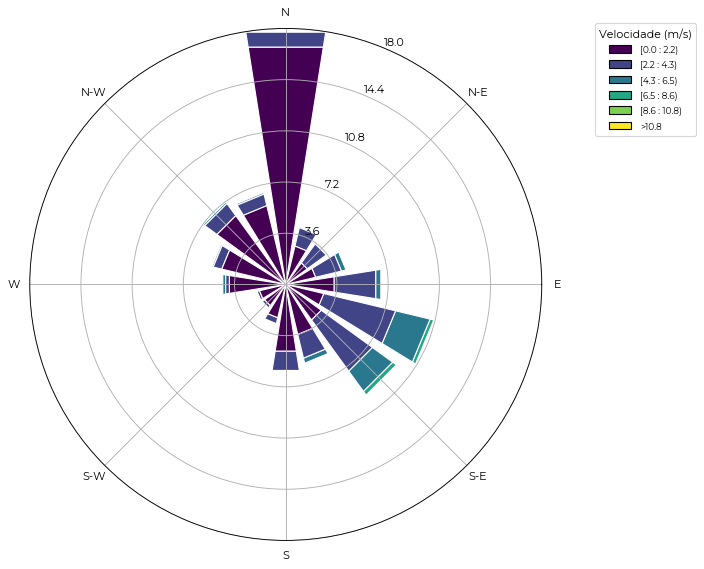

In [30]:
wind = metar[['Data','WindDirection','WindSpeed']].dropna()

ax = WindroseAxes.from_ax()
plt.rc('font',family='Montserrat')
ax.bar(wind['WindDirection'], wind['WindSpeed'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend(title = 'Velocidade (m/s)', loc='center right', bbox_to_anchor=(1.3,0.9))
plt.show()

No presente estudo, observa-se a predominância de ventos nos quadrantes **norte** e **sudeste**, que são os ventos predominantes no estado de Santa Catarina.

**Discussão sobre as condições meteorológicas locais e possíveis reflexos na qualidade do ar**

Ao analisar as condições na área circundante à empresa, observa-se que o bairro Pirabeiraba, em Joinville, está localizado ao norte da fonte de emissão. Nesse contexto, eventos meteorológicos de frente fria com vento sul podem representar potenciais riscos para essa região devido à sua proximidade com a fonte. Por outro lado, a maior parte de Joinville encontra-se a sudeste da empresa, tornando os ventos provenientes do quadrante norte potencialmente prejudiciais para essa área. Essa configuração geográfica destaca a importância de considerar os padrões de vento ao avaliar os possíveis impactos da emissão de poluentes atmosféricos na região.

______________________

#### **Estudo da estabilidade atmosférica**

O estudo da estabilidade atmosférica descreve a tendência da atmosfera em resistir ou promover o movimento vertical do ar. Para compreender a dinâmica atmosférica, utiliza-se o perfil de temperatura, que refere-se à variação da temperatura com a altitude. A taxa de variação da temperatura com a altura é conhecida como gradiente térmico.

O gradiente adiabático seco é uma taxa de variação teórica que se refere à mudança de temperatura de uma parcela de ar seco que se desloca verticalmente sem troca de calor com o ambiente. Essa taxa corresponde a **9,80°C/km.** Na realidade, esse processo idealizado não ocorre na atmosfera, pois a turbulência tende a destruir o volume teoricamente isolado e promove a troca de calor. Portanto, o gradiente adiabático seco serve apenas como referência para estimar as características turbulentas na atmosfera real. A seguir, são apresentados os principais perfis de estabilidade da atmosfera, que descrevem como a temperatura varia com a altura e como isso afeta a estabilidade do ar. A estabilidade atmosférica é determinada pela comparação entre o gradiente térmico ambiente e o gradiente adiabático.

| Perfil de estabilidade | Descrição |
| --- | --- |
| Neutro | O gradiente térmico encontra-se próximo a 9,80°C/km. O ar permanece em *equilíbrio* sem tendência para subir ou descer. |
| Superadiabático | O gradiente térmico é maior que 9,80°C/km. A atmosfera é *muito instável*, favorecendo a convecção e a mistura vertical, promovendo a dispersão dos poluentes. |
| Subadiabático | O gradiente térmico é menor que 9,80°C/km. A atmosfera é *levemente estável*, limitando a dispersão dos poluentes. |
| Isotérmico | A temperatura permanece constante com a altura, ou seja, o gradiente termico é nulo. |
| Inversão | A temperatura aumenta com a altura. As inversões térmicas resistem ao movimento vertical e tendem a suprimir a turbulência e a dispersão dos poluentes |

Para o presente estudo, foi analisado o perfil de temperatura da **Estação de Monitoramento no Aeroporto de Florianópolis** às 0 e 12 horas durante 10 dias, sendo 5 dias no verão e 5 dias no inverno. Além disso, foram identificados os pontos de inversão e determinada a possível altura da camada limite. A altura da camada limite foi estimada como o primeiro ponto de inversão do gradiente de temperatura.

**Período de Verão**

In [31]:
dict = {'Data':[],'Season':[],'Period':[],'Height':[]}
days = [5,10,15,5,15]
month = [1,1,1,2,2]

for i in range(5):
    for j in [0,12]:
        #Obtenção dos dados 
        date = datetime(2023, month[i] , days[i], j)
        station = 'SBFL'
        profile_data = WyomingUpperAir.request_data(date, station)
        data = datetime.strptime(f'{days[i]}/{month[i]}/2023 {j}:00:00', '%d/%m/%Y %H:%M:%S')

        #Cálculo do gradiente térmico, inversões e camada limite
        gradiente_termico = numpy.gradient(profile_data.temperature, profile_data.height)
        delta_gradiente = numpy.abs(numpy.diff(gradiente_termico))
        inversoes = numpy.where(numpy.diff(numpy.sign(numpy.diff(profile_data.temperature))))[0] + 1
        camada_limite = inversoes.min()

        #Adicionando informações a tabela de resultados
        dict['Data'].append(data)
        dict['Season'].append('Verão')
        dict['Height'].append(profile_data.height.iloc[camada_limite])
        if j == 0:
            dict['Period'].append('Noite')
        else:
            dict['Period'].append('Dia')

        #Plotagem da figura
        plt.figure(figsize=(20,12))
        plt.rc('font',family='Montserrat')
        plt.scatter(profile_data.temperature.iloc[inversoes], profile_data.height.iloc[inversoes], s=20, color='blue',alpha=0.5,label= 'Pontos de inversão')
        plt.plot(profile_data.temperature,profile_data.height, color='red', alpha=0.9, linewidth=1, label= 'Dados observados')
        plt.axhline(profile_data.height.iloc[camada_limite], color='purple', alpha=0.9, linewidth=1.2, linestyle='--',label= 'Camada limite')
        plt.title(f'Perfil de temperatura ({data})', fontsize=15)
        plt.xlabel('Temperatura (°C)', fontsize=13)
        plt.ylabel('Altura (m)', fontsize=13)
        plt.grid(alpha=0.2)
        plt.legend(fontsize=12)
        plt.xticks(range(-80,30,10))
        plt.margins(y=0.2)
        plt.show()

HTTPError: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2023&MONTH=01&FROM=0500&TO=0500&STNM=SBFL
Server Error (503: Sorry, the server is too busy to process your request.
Please try again later.
)

**Período de Inverno**

In [ ]:
days = [10,25,5,10,15]
month = [7,7,8,8,8]

for i in range(5):
    for j in [0,12]:
        #Obtenção dos dados 
        date = datetime(2023, month[i] , days[i], j)
        station = 'SBFL'
        profile_data = WyomingUpperAir.request_data(date, station)
        data = datetime.strptime(f'{days[i]}/{month[i]}/2023 {j}:00:00', '%d/%m/%Y %H:%M:%S')

        #Cálculo do gradiente térmico, inversões e camada limite
        gradiente_termico = numpy.gradient(profile_data.temperature, profile_data.height)
        delta_gradiente = numpy.abs(numpy.diff(gradiente_termico))
        inversoes = numpy.where(numpy.diff(numpy.sign(numpy.diff(profile_data.temperature))))[0] + 1
        camada_limite = inversoes.min()

        #Adicionando informações a tabela de resultados
        dict['Data'].append(data)
        dict['Season'].append('Inverno')
        dict['Height'].append(profile_data.height.iloc[camada_limite])
        if j == 0:
            dict['Period'].append('Noite')
        else:
            dict['Period'].append('Dia')
            
        #Plotagem da figura
        plt.figure(figsize=(20,12))
        plt.rc('font',family='Montserrat')
        plt.scatter(profile_data.temperature.iloc[inversoes], profile_data.height.iloc[inversoes], s=20, color='blue',alpha=0.5,label= 'Pontos de inversão')
        plt.plot(profile_data.temperature,profile_data.height, color='red', alpha=0.9, linewidth=1, label= 'Dados observados')
        plt.axhline(profile_data.height.iloc[camada_limite], color='purple', alpha=0.9, linewidth=1.2, linestyle='--',label= 'Camada limite')
        plt.title(f'Perfil de temperatura ({data})', fontsize=15)
        plt.xlabel('Temperatura (°C)', fontsize=13)
        plt.ylabel('Altura (m)', fontsize=13)
        plt.grid(alpha=0.2)
        plt.legend(fontsize=12)
        plt.xticks(range(-80,30,10))
        plt.margins(y=0.2)
        plt.show()

SyntaxError: positional argument follows keyword argument (436083319.py, line 32)

A **camada limite atmosférica** é a camada inferior da troposfera, com uma altura típica de cerca de **1 a 2km** acima da superfície terrestre. Essa região é diretamente influenciada por processos antrópicos, onde quase todos os poluentes emitidos são transportados, transformados e removidos. A turbulência é fortemente presente nessa camada, mantendo-a relativamente bem misturada. A espessura da camada limite atmosférica varia conforme a latitude, o ciclo das estações e a alternância entre dia e noite.
- Durante o dia, surge uma camada limite convectiva bem constituída, com forte presença de turbulência.
- À noite, o movimento convectivo cessa, tornando a camada limite mais baixa e estável, com pouca turbulência.

Ao longo das estações do ano, a camada limite tende a ser mais alta e mais turbulenta durante o verão devido ao aquecimento intenso da superfície terrestre. No inverno, por sua vez, a camada limite geralmente é mais baixa e mais estável devido ao resfriamento da superfície terrestre. A dispersão de poluentes na atmosfera é influenciada diretamente pela estabilidade atmosférica e pelo gradiente térmico. Em condições instáveis ou turbulentas, a dispersão vertical é facilitada, resultando em uma distribuição mais ampla e menos concentrada de poluentes. A convecção auxilia na diluição dos poluentes ao misturá-los com ar mais limpo das camadas superiores.

In [ ]:
estatistics2 = pandas.DataFrame(dict)
print('Altura média da camada limite no verão:' + ' ' + str(estatistics2[estatistics2.Season == 'Verão']['Height'].mean()) + ' m')
print('Altura média da camada limite no inverno:' + ' ' + str(estatistics2[estatistics2.Season == 'Inverno']['Height'].mean()) + ' m')
print('Altura média da camada limite a noite:' + ' ' + str(estatistics2[estatistics2.Period == 'Noite']['Height'].mean()) + ' m')
print('Altura média da camada limite ao dia:' + ' ' + str(estatistics2[estatistics2.Period == 'Dia']['Height'].mean()) + ' m')
estatistics2

Altura média da camada limite no verão: 1461.2 m
Altura média da camada limite no inverno: 534.2 m
Altura média da camada limite a noite: 913.3 m
Altura média da camada limite ao dia: 1082.1 m


,Data,Season,Period,Height
0,2023-01-05 00:00:00,Verão,Noite,109.0
1,2023-01-05 12:00:00,Verão,Dia,2807.0
2,2023-01-10 00:00:00,Verão,Noite,1464.0
3,2023-01-10 12:00:00,Verão,Dia,1578.0
4,2023-01-15 00:00:00,Verão,Noite,701.0
5,2023-01-15 12:00:00,Verão,Dia,995.0
6,2023-02-05 00:00:00,Verão,Noite,4605.0
7,2023-02-05 12:00:00,Verão,Dia,300.0
8,2023-02-15 00:00:00,Verão,Noite,599.0
9,2023-02-15 12:00:00,Verão,Dia,1454.0


Segundo a dissertação de mestrado de **André Malheiros**, a aplicação de modelos para a determinação da camada limite sobre a região de Curitiba revelou que a altura da camada limite diurna é menor no inverno, variando entre 700 e 1000 metros, em comparação com o verão, que atinge cerca de 1500 m. Desconsiderando as diferenças entre os locais analisados e para fins de comparação, a altura média da camada limite observada neste estudo, de 1461 metros no verão e de 534 metros no inverno, estão próximas aos valores constatados na referência citada.

*(http://www.lemma.ufpr.br/wiki/images/e/ed/Cynara_2.pdf)*

______________________

#### **Análise de dados espaciais**

Execute o EZ-AERMET e  avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.  Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.